In [1]:
# I'll leave this 1st cell just for importings.
import pandas as pd

In [2]:
file_path = r'C:\Users\utilizador\Documents\a_hjoaquim\semestre2_5oano\PSn\Bayesian-training\51006_data.csv'
df = pd.read_csv(file_path)

In [3]:
df

,Doenca,Fumo,Falta de força,Dificuldade em pegar
0,Pistons,1,1,0
1,Pistons,0,1,0
2,Injetores,1,1,0
3,Injetores,1,0,1
4,Pistons,0,1,1
...,...,...,...,...
307,Pistons,1,1,0
308,Eletrico,1,1,1
309,Eletrico,0,0,1
310,Injetores,1,0,1


In [4]:
# Let's change our 'Doenca', wich is a String to an integer, with the following correspondense:
# Injetores - 1
# Pistons - 2
# Problema Electico - 3
# BTW, the field 'Doenca' is our Class, meaning: the stuff we want to classify.
# Since we're doing a Baysian Analysis we'll not predict one class, instead we will tell the most lekely one.

In [5]:
# Keeping track, just to control if we don't lose any data.
pistonsCounter = 0; eletricoCounter = 0; injetoresCounter = 0
for d in df['Doenca'] :
    if d == 'Injetores': 
        injetoresCounter += 1
    elif(d == 'Pistons'): 
        pistonsCounter += 1
    elif(d == 'Eletrico'): 
        eletricoCounter += 1
    
print("Presenting our conters: \n")
print("Instances labeled 'Injetores': {}".format(injetoresCounter))
print("Instances labeled 'Pistons': {}".format(pistonsCounter))
print("Instances labeled 'Eletrico': {}".format(eletricoCounter))

Presenting our conters: 

Instances labeled 'Injetores': 71
Instances labeled 'Pistons': 127
Instances labeled 'Eletrico': 114


In [6]:
# Getting rid of un-wanted spaces in the strings.
df['Doenca'] = df['Doenca'].apply(lambda x: x.strip())

In [7]:
df = df.replace({'Injetores': 1}, regex=True)
df = df.replace({'Pistons': 2}, regex=True)
df = df.replace({'Eletrico': 3}, regex=True)

In [8]:
# Let's see if we haven't messed with our dataframe and the counters still make sense.
pistonsCounter = 0; eletricoCounter = 0; injetoresCounter = 0
for d in df['Doenca'] :
    if d == 1: 
        injetoresCounter += 1
    elif(d == 2): 
        pistonsCounter += 1
    elif(d == 3): 
        eletricoCounter += 1
    
print("Presenting our control conters: \n")
print("Instances labeled 'Injetores': {}".format(injetoresCounter))
print("Instances labeled 'Pistons': {}".format(pistonsCounter))
print("Instances labeled 'Eletrico': {}".format(eletricoCounter))

Presenting our control conters: 

Instances labeled 'Injetores': 71
Instances labeled 'Pistons': 127
Instances labeled 'Eletrico': 114


In [9]:
df

,Doenca,Fumo,Falta de força,Dificuldade em pegar
0,2,1,1,0
1,2,0,1,0
2,1,1,1,0
3,1,1,0,1
4,2,0,1,1
...,...,...,...,...
307,2,1,1,0
308,3,1,1,1
309,3,0,0,1
310,1,1,0,1


In [10]:
# Let's create our new table aka dataframe.
# This will be our probabilities and contional probabilities table!
# Based ont that we'll be able to build our Bayesian  Tree
probDf = pd.DataFrame(columns = ['Avaria', 'P(d)', 'P(Fumo|Problema)', 'P(Falta de força|Problema)', 'P(Dificuldade em pegar|Problema)'])
probDf

,Avaria,P(d),P(Fumo|Problema),P(Falta de força|Problema),P(Dificuldade em pegar|Problema)


In [11]:
nRows = df['Doenca'].count()                           # total of rows in the dataset
nInjetores = df['Doenca'].tolist().count(1)            # total of lines labeled 'Injetores'
nPistons = df['Doenca'].tolist().count(2)              # total of lines labeled 'Pistons'
nEletrico =  df['Doenca'].tolist().count(3)            # total of lines labeled 'Eletrico'

pdInjetores = nInjetores / nRows
pdPistons = nPistons / nRows
pdEletrico = nEletrico / nRows


# If the sum is equal to 1, we're good to go!
print(pdInjetores); print(pdPistons); print(pdEletrico)
print(pdInjetores + pdPistons + pdEletrico)

# Let's put the probability of each problem in a array
#pd = []; pd.append(pdInjetores); pd.append(pdPistons); pd.append(pdEletrico)
pd = []; pd.extend([pdInjetores, pdPistons, pdEletrico])

0.22756410256410256
0.40705128205128205
0.36538461538461536
1.0


In [12]:
# Getting the universe of each problem.
dfInjetores = df.loc[df['Doenca'] == 1]
dfPistons = df.loc[df['Doenca'] == 2]
dfEletrico = df.loc[df['Doenca'] == 3]

In [13]:
# Calculating each conditional probability 
# Format: P(symptom | problem)
p_Fumo_Injetores = dfInjetores['Fumo'].sum() / nInjetores
p_Fumo_Pistons = dfPistons['Fumo'].sum() / nPistons
p_Fumo_Eletrico = dfEletrico['Fumo'].sum() / nEletrico
p_Fumo_Problema = []; p_Fumo_Problema.extend([p_Fumo_Injetores, p_Fumo_Pistons, p_Fumo_Eletrico]) 

p_FaltaForca_Injetores = dfInjetores['Falta de força'].sum() / nInjetores
p_FaltaForca_Pistons = dfPistons['Falta de força'].sum() / nPistons
p_FaltaForca_Eletrico = dfEletrico['Falta de força'].sum() / nEletrico
p_FaltaForca_Problema = []; p_FaltaForca_Problema.extend([p_FaltaForca_Injetores, p_FaltaForca_Pistons, p_FaltaForca_Eletrico])

p_DificuldadePegar_Injetores = dfInjetores['Dificuldade em pegar'].sum() / nInjetores
p_DificuldadePegar_Pistons = dfPistons['Dificuldade em pegar'].sum() / nPistons
p_DificuldadePegar_Eletrico = dfEletrico['Dificuldade em pegar'].sum() / nEletrico
p_DificuldadePegar_Problema = []; p_DificuldadePegar_Problema.extend([p_DificuldadePegar_Injetores, p_DificuldadePegar_Pistons, p_DificuldadePegar_Eletrico])

In [14]:
# After all those calculations and stuff, let's seed how our probabilities table will look like!
probDf['Avaria'] = ['Injetores', 'Pistons', 'Eletrico']
probDf['P(d)'] = pd
probDf['P(Fumo|Problema)'] = p_Fumo_Problema; probDf['P(/Fumo|Problema)'] = (1 - probDf['P(Fumo|Problema)'])
probDf['P(Falta de força|Problema)'] = p_FaltaForca_Problema; probDf['P(/Falta de força|Problema)'] = (1 - probDf['P(Falta de força|Problema)'])
probDf['P(Dificuldade em pegar|Problema)'] = p_DificuldadePegar_Problema; probDf['P(/Dificuldade em pegar|Problema)'] = (1 - probDf['P(Dificuldade em pegar|Problema)'])
probDf

,Avaria,P(d),P(Fumo|Problema),P(Falta de força|Problema),P(Dificuldade em pegar|Problema),P(/Fumo|Problema),P(/Falta de força|Problema),P(/Dificuldade em pegar|Problema)
0,Injetores,0.227564,0.887324,0.225352,0.366197,0.112676,0.774648,0.633803
1,Pistons,0.407051,0.669291,0.913386,0.181102,0.330709,0.086614,0.818898
2,Eletrico,0.365385,0.228070,0.096491,0.815789,0.771930,0.903509,0.184211


In [15]:
list1 = probDf['P(d)'].tolist()
list2 = probDf['P(Fumo|Problema)'].tolist()

In [16]:
#newList = [ a * b for a, b in zip(list1, list2)]
denominator = sum([ a * b for a, b in zip(list1, list2)])
newList = [ (a * b) / denominator for a, b in zip(list1, list2)]
newList

[0.3620689655172414, 0.4885057471264368, 0.14942528735632182]

In [25]:
# Inputs: conditionalProbList, symptomProbList
# Outputs: returns a list with the probabilities of the symptom given the problem
def calcConditional(conditionalProbList, symptomProbList):
    denominator = sum([ a * b for a, b in zip(conditionalProbList, symptomProbList)])
    return [ (a * b) / denominator for a, b in zip(conditionalProbList, symptomProbList)]

In [26]:
# Tree's level 1
lvl1_FumoYes = calcConditional(probDf['P(d)'].tolist(), probDf['P(Fumo|Problema)'].tolist())
lvl1_FumoNo = calcConditional(probDf['P(d)'].tolist(), probDf['P(/Fumo|Problema)'].tolist())

# Tree's level 2
faltaForcaProblemaList = probDf['P(Falta de força|Problema)'].tolist()
notFaltaForcaProblemaList = probDf['P(/Falta de força|Problema)'].tolist()

lvl2_FumoYes_FaltaForcaYes = calcConditional(lvl1_FumoYes, faltaForcaProblemaList)
lvl2_FumoYes_FaltaForcaNo = calcConditional(lvl1_FumoYes, notFaltaForcaProblemaList)

lvl2_FumoNo_FaltaForcaYes = calcConditional(lvl1_FumoNo, faltaForcaProblemaList)
lvl2_FumoNo_FaltaForcaNo = calcConditional(lvl1_FumoNo, notFaltaForcaProblemaList)

# Tree's level 3
dificuldadeProblemaList = probDf['P(Dificuldade em pegar|Problema)'].tolist()
notDificuldadeProblemaList = probDf['P(/Dificuldade em pegar|Problema)'].tolist()

lvl3_FumoYes_FaltaForcaYes_DificuldadeYes = calcConditional(lvl2_FumoYes_FaltaForcaYes, dificuldadeProblemaList)
lvl3_FumoYes_FaltaForcaYes_DificuldadeNo = calcConditional(lvl2_FumoYes_FaltaForcaYes, notDificuldadeProblemaList)

lvl3_FumoYes_FaltaForcaNo_DificuldadeYes = calcConditional(lvl2_FumoYes_FaltaForcaNo, dificuldadeProblemaList)
lvl3_FumoYes_FaltaForcaNo_DificuldadeYes = calcConditional(lvl2_FumoYes_FaltaForcaNo, notDificuldadeProblemaList)

lvl3_FumoNo_FaltaForcaYes_DificuldadeYes = calcConditional(lvl2_FumoNo_FaltaForcaYes, dificuldadeProblemaList)
lvl3_FumoNo_FaltaForcaYes_DificuldadeNo = calcConditional(lvl2_FumoNo_FaltaForcaYes, notDificuldadeProblemaList)

lvl3_FumoNo_FaltaForcaNo_DificuldadeYes = calcConditional(lvl2_FumoNo_FaltaForcaNo, dificuldadeProblemaList)
lvl3_FumoNo_FaltaForcaNo_DificuldadeNo = calcConditional(lvl2_FumoNo_FaltaForcaNo, notDificuldadeProblemaList)


print('*** Level 1 ***'); print(lvl1_FumoYes); print(lvl1_FumoNo)
print('\n\n*** Level 2 ***'); print(lvl2_FumoYes_FaltaForcaYes); print(lvl2_FumoYes_FaltaForcaNo); print(lvl2_FumoNo_FaltaForcaYes); print(lvl2_FumoNo_FaltaForcaNo)
print('\n\n*** Level 3 ***');print(lvl3_FumoYes_FaltaForcaYes_DificuldadeYes);print(lvl3_FumoYes_FaltaForcaYes_DificuldadeNo);print(lvl3_FumoYes_FaltaForcaNo_DificuldadeYes);print(lvl3_FumoYes_FaltaForcaNo_DificuldadeYes);print(lvl3_FumoNo_FaltaForcaYes_DificuldadeYes);print(lvl3_FumoNo_FaltaForcaYes_DificuldadeNo);print(lvl3_FumoNo_FaltaForcaNo_DificuldadeYes);print(lvl3_FumoNo_FaltaForcaNo_DificuldadeNo)

*** Level 1 ***
[0.3620689655172414, 0.4885057471264368, 0.14942528735632182]
[0.05797101449275362, 0.30434782608695654, 0.6376811594202898]


*** Level 2 ***
[0.15048355670453575, 0.8229246243170956, 0.026591818978368688]
[0.6126677704218254, 0.09242469677529595, 0.2949075328028785]
[0.0370521138121524, 0.7884332426789654, 0.17451464350888224]
[0.06936336428126896, 0.04071684100132756, 0.8899197947174035]


*** Level 3 ***
[0.24401444657826799, 0.6599266476151932, 0.09605890580653884]
[0.1231994813106943, 0.8704730769340028, 0.0063274417553029864]
[0.749168589033506, 0.14602190604866538, 0.1048095049178286]
[0.749168589033506, 0.14602190604866538, 0.1048095049178286]
[0.04542131943822837, 0.4779921886002856, 0.4765864919614861]
[0.033487087766672266, 0.9206716524903523, 0.04584125974297548]
[0.033476473236278545, 0.009718354596010852, 0.9568051721677105]
[0.18223769310258256, 0.13821576736667412, 0.6795465395307434]


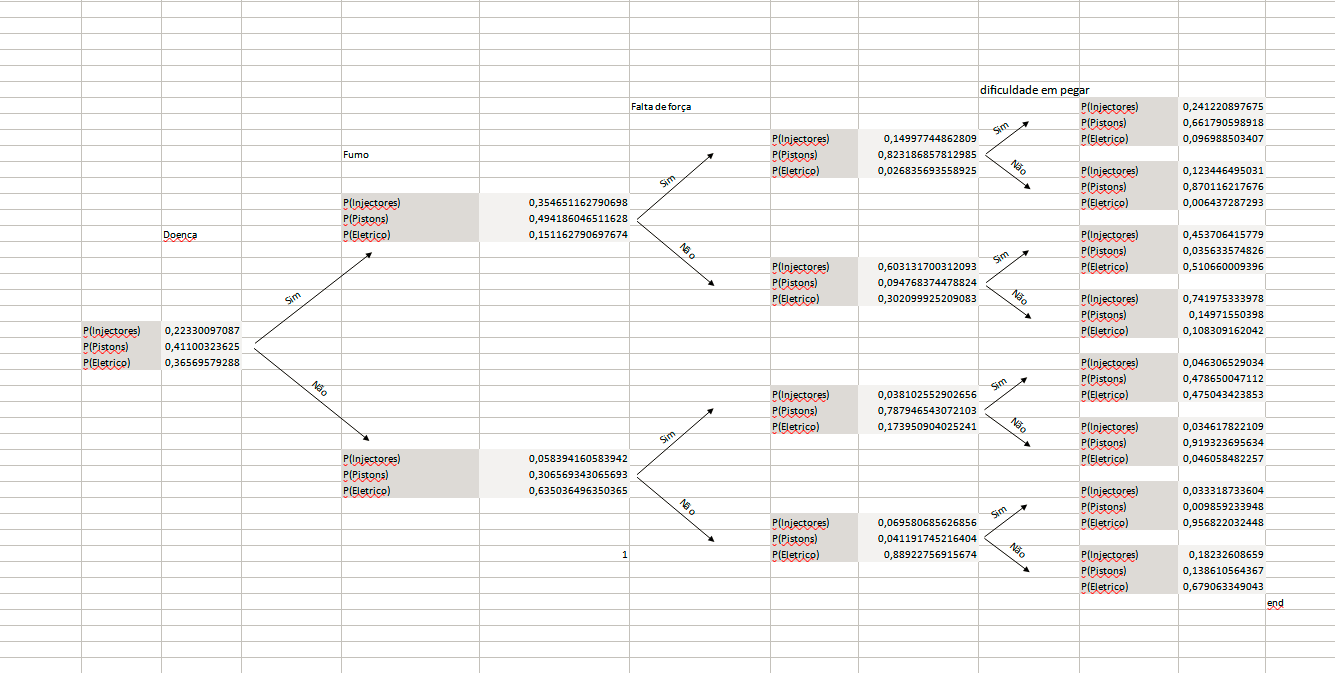